In [231]:
import os
import math
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [232]:
# care_management = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/care_management_anonymized.csv'
care_management = r'C:\Users\parob\dthon\2022_datathon_team_2\data\care_management_anonymized.csv'

In [233]:
volunteer_services = r"C:\Users\parob\dthon\2022_datathon_team_2\data\volunteer_services_anonymized.csv"
client_info = r"C:\Users\parob\dthon\2022_datathon_team_2\data\client_info_anonymized.csv"
donations = r"C:\Users\parob\dthon\2022_datathon_team_2\data\donations_anonymized.csv"
pantry = r"C:\Users\parob\dthon\2022_datathon_team_2\data\pantry_anonymized.csv"

In [234]:
care_management_data = pd.read_csv(care_management) #opens the file in read mode

In [235]:
volunteer_services_data = pd.read_csv(volunteer_services) #opens the file in read mode
client_info_data = pd.read_csv(client_info) #opens the file in read mode
donations_data = pd.read_csv(donations) #opens the file in read mode
pantry_data = pd.read_csv(pantry) #opens the file in read mode

## Donations Visualization - Code Added by PB

In [236]:
donations_data.head()

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift


In [237]:
donations_data.dtypes

anon_donor_id      int64
zip              float64
status            object
do_not_mail         bool
do_not_call         bool
organisation      object
date              object
amount           float64
form              object
campaign          object
target            object
dtype: object

In [238]:
donations_data.isna().sum()
## 135 donar zip codes are missing from the dataset

anon_donor_id      0
zip              135
status             1
do_not_mail        0
do_not_call        0
organisation       0
date               0
amount             0
form               1
campaign           0
target             0
dtype: int64

In [239]:
donations_data.shape

(2190, 11)

In [240]:
## Creating a new df with no missing data
donations_data_clean = donations_data.dropna()

In [241]:
donations_data_clean.isna().sum()

anon_donor_id    0
zip              0
status           0
do_not_mail      0
do_not_call      0
organisation     0
date             0
amount           0
form             0
campaign         0
target           0
dtype: int64

In [242]:
donations_data_clean['zip'].nunique()
## the zip code are from 103 unique zip codes

103

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCE9181F48>]],
      dtype=object)

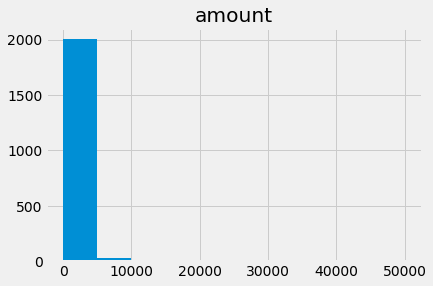

In [243]:
## Let's review the distributions of the amount
donations_data_clean.hist(column="amount")

In [244]:
donations_data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
anon_donor_id,2054.0,538.014606,308.758408,1.0,268.0,553.5,821.75,1058.0
zip,2054.0,19573.761928,6539.330049,2067.0,19010.0,19066.0,19096.00,98110.0
amount,2054.0,477.779825,2254.024353,0.0,50.0,100.0,169.50,50000.0


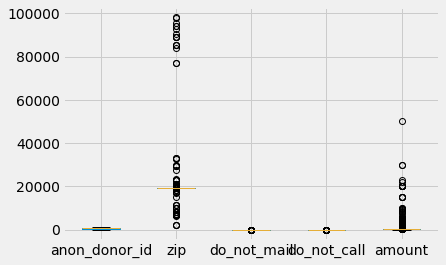

In [245]:
donations_data_clean.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcedbe6c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcedbebe88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcedbe6ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcedbefe08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcedbf3c88>],
 'means': []}

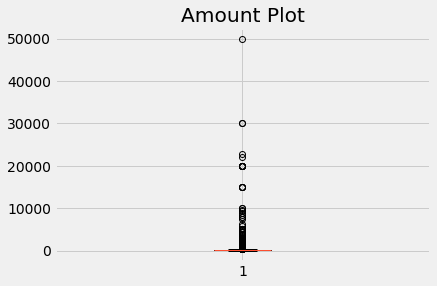

In [246]:
ig1, ax1 = plt.subplots()
ax1.set_title('Amount Plot')
ax1.boxplot(donations_data_clean['amount'])

In [247]:
donations_data_clean['amount'].median(axis=0)
## Most common donation is $100

100.0

In [248]:
donations_data_clean_high = donations_data_clean[donations_data_clean['amount']>100]
donations_data_clean_high.shape

(612, 11)

In [249]:
donations_data_clean_high['zip'].nunique()
## There are 59 zip codes which provided a donation of over $100 dollars

59

In [250]:
donations_data_clean_high['zip'].value_counts()

19010.0    105
19096.0     99
19041.0     67
19003.0     56
19072.0     36
19004.0     34
19066.0     29
19035.0     27
19085.0     18
19087.0     17
19103.0     13
20814.0     11
19333.0      6
19063.0      6
19146.0      5
19107.0      4
19428.0      4
19073.0      4
19422.0      4
19008.0      4
6824.0       3
6828.0       3
19064.0      3
19036.0      3
18103.0      3
19101.0      3
19403.0      2
19301.0      2
94063.0      2
32963.0      2
19382.0      2
10038.0      2
19426.0      2
23060.0      2
19104.0      2
19083.0      2
19127.0      2
19020.0      2
19454.0      1
83835.0      1
19805.0      1
19095.0      1
19312.0      1
19344.0      1
30004.0      1
27587.0      1
19145.0      1
21117.0      1
19462.0      1
15206.0      1
19406.0      1
20166.0      1
19399.0      1
19446.0      1
95404.0      1
19401.0      1
20895.0      1
19890.0      1
19470.0      1
Name: zip, dtype: int64

In [251]:
donations_data_clean_high.head()

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
2,559,19146.0,Active,False,False,N,01/02/2019,250.00,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.00,Check,Misc,Gift
9,192,19403.0,Active,False,False,N,01/09/2019,1000.00,Check,Corporatio,Gift
10,396,19010.0,Active,False,False,N,01/10/2019,20000.00,Check,Corporatio,Gift
15,864,20814.0,Active,False,False,N,01/15/2019,304.01,Check,Misc,Gift


In [252]:
don_num_by_zip = donations_data_clean_high.groupby(['zip']).count()

In [253]:
don_num_by_zip.columns

Index(['anon_donor_id', 'status', 'do_not_mail', 'do_not_call', 'organisation',
       'date', 'amount', 'form', 'campaign', 'target'],
      dtype='object')

In [254]:
type(don_num_by_zip)

pandas.core.frame.DataFrame

In [255]:
don_num_by_zip.shape

(59, 10)

In [256]:
don_num_by_zip.tail()

,anon_donor_id,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
zip,,,,,,,,,,
30004.0,1,1,1,1,1,1,1,1,1,1
32963.0,2,2,2,2,2,2,2,2,2,2
83835.0,1,1,1,1,1,1,1,1,1,1
94063.0,2,2,2,2,2,2,2,2,2,2
95404.0,1,1,1,1,1,1,1,1,1,1


In [257]:
don_num_by_zip.reset_index(inplace=True)

In [258]:
don_num_by_zip.columns

Index(['zip', 'anon_donor_id', 'status', 'do_not_mail', 'do_not_call',
       'organisation', 'date', 'amount', 'form', 'campaign', 'target'],
      dtype='object')

In [259]:
don_num_by_zip.drop(['status', 'do_not_mail', 'do_not_call',
       'organisation', 'date', 'amount', 'form', 'campaign', 'target'], axis=1, inplace = True)

In [260]:
don_num_by_zip_viz = don_num_by_zip.copy()

In [261]:
don_num_by_zip_viz.columns

Index(['zip', 'anon_donor_id'], dtype='object')

In [262]:
don_num_by_zip_viz['count_donations']= don_num_by_zip_viz['anon_donor_id']

In [263]:
don_num_by_zip_viz.drop(['anon_donor_id'],axis=1, inplace=True)

In [264]:
don_num_by_zip_viz.sort_values(by=['count_donations'],ascending = False)

,zip,count_donations
8,19010.0,105
22,19096.0,99
12,19041.0,67
5,19003.0,56
16,19072.0,36
6,19004.0,34
15,19066.0,29
10,19035.0,27
19,19085.0,18
20,19087.0,17


In [265]:
don_num_by_zip_fin = don_num_by_zip_viz[don_num_by_zip_viz['count_donations']>4]

In [266]:
DV = don_num_by_zip_fin.sort_values(by="count_donations",ascending=False)

In [267]:
## There are 12 zip codes with more than 10 donations.
DV

,zip,count_donations
8,19010.0,105
22,19096.0,99
12,19041.0,67
5,19003.0,56
16,19072.0,36
6,19004.0,34
15,19066.0,29
10,19035.0,27
19,19085.0,18
20,19087.0,17


In [268]:
DV.set_index('zip',inplace=True)

Text(0, 0.5, 'Number of Donations')

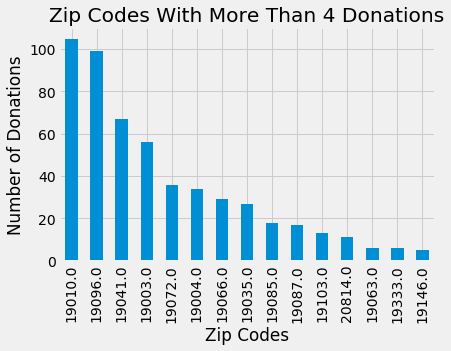

In [269]:
plt.style.use('fivethirtyeight')
DV['count_donations'].plot(kind='bar')
plt.title("Zip Codes With More Than 4 Donations")
plt.xlabel("Zip Codes")
plt.ylabel("Number of Donations")

In [270]:
donations_data_clean_high.describe()

,anon_donor_id,zip,amount
count,612.000000,612.000000,612.000000
mean,537.398693,19515.142157,1463.710670
std,327.385354,6120.189385,3960.052147
min,5.000000,6824.000000,105.000000
25%,221.000000,19010.000000,200.000000
50%,559.000000,19041.000000,300.000000
75%,854.250000,19096.000000,1000.000000
max,1057.000000,95404.000000,50000.000000


In [271]:
don_amt_by_zip = donations_data_clean_high.groupby(['zip'])['amount'].sum().reset_index()

In [272]:
DV2 = don_amt_by_zip.sort_values(by='amount', ascending=False)

In [273]:
DV2 = DV2[DV2['amount']>10000]
DV2.set_index('zip',inplace = True)

In [274]:
DV2

,amount
zip,
19010.0,184359.17
19003.0,157340.80
19101.0,100000.00
19428.0,60000.00
19096.0,59637.00
19107.0,45530.00
19041.0,42085.73
19035.0,28782.00
19004.0,23500.00


Text(0, 0.5, 'Total Donations Amount')

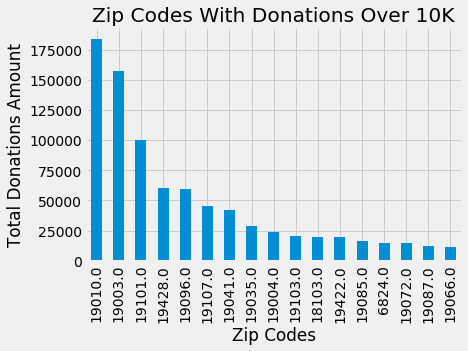

In [275]:
plt.style.use('fivethirtyeight')
DV2['amount'].plot(kind='bar')
plt.title("Zip Codes With Donations Over 10K")
plt.xlabel("Zip Codes")
plt.ylabel("Total Donations Amount")

In [313]:
pantry_data.head()
pantry_data['assistance_date']=pd.to_datetime(pantry_data.assistance_date, infer_datetime_format=True)
pantry_data.dtypes

anon_ID                         int64
assistance_date        datetime64[ns]
assistance_category            object
amount                          int64
unit                           object
dtype: object

In [321]:
pantry_data.tail()

,anon_ID,assistance_date,assistance_category,amount,unit
6268,611,2021-09-07 14:15:00,Food Pantry: Food Pantry Poundage,25,Pounds
6269,516,2021-09-07 14:55:00,Food Pantry: Food Pantry Poundage,25,Pounds
6270,274,2021-09-07 15:00:00,Food Pantry: Food Pantry Poundage,25,Pounds
6271,524,2021-09-07 15:15:00,Food Pantry: Food Pantry Poundage,25,Pounds
6272,191,2021-09-09 14:25:00,Food Pantry: Food Pantry Poundage,25,Pounds


In [325]:
pantry_data.groupby(['assistance_category'])['amount'].sum()

assistance_category
Food Pantry: Easter Outreach            109
Food Pantry: Food Pantry Poundage    145370
Food Pantry: Holiday Baskets          13220
Name: amount, dtype: int64

In [308]:
client_info_data.head()

,anon_ID,county,poverty,minority,age_group
0,1,Montgomery,No,NaN,P
1,2,Montgomery,No,No,D
2,3,Montgomery,No,No,P
3,5,Montgomery,No,NaN,G
4,6,Montgomery,Yes,NaN,NaN


## Code added by PB ends above

In [276]:
care_management_data

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [277]:
care_management_data.isna().sum()

anon_ID                    0
assistance_date            0
assistance_category        0
amount                     0
unit                       0
CommType                7819
Party                   7812
InitiatedBy             7842
Benefit_1               8427
Assistance_1            8361
Benefit_2              11896
Assistance_2           11899
Benefit_3              12403
Assistance_3           12404
dtype: int64

In [278]:
care_management_data.shape

(12487, 14)

In [279]:
care_management_data.select_dtypes(include=['object']).columns

Index(['assistance_date', 'assistance_category', 'unit', 'CommType', 'Party',
       'InitiatedBy', 'Benefit_1', 'Assistance_1', 'Benefit_2', 'Assistance_2',
       'Benefit_3', 'Assistance_3'],
      dtype='object')

In [280]:
care_management_data_grouped_1 = care_management_data.groupby(by=['anon_ID','assistance_category','unit', 'CommType','Party','InitiatedBy','Benefit_1','Assistance_1','Benefit_2','Assistance_2','Benefit_3','Assistance_3'], dropna=False).sum().reset_index()
care_management_data_grouped_1

In [281]:
care_management_data_grouped_1['anon_ID'].unique()

In [282]:
client_info_data['anon_ID'].unique().count()

In [283]:
care_management_data['anon_ID'].unique().size

490

In [284]:
client_info_data['anon_ID'].unique().size

641

In [285]:
care_management_data_grouped_1['anon_ID'].unique().size

In [286]:
care_management_data['Party'].unique()

array([nan, 'Client', 'Service Provider', 'ElderNet', 'Family', 'Other',
       'Social Worker', 'Friend', 'Eldernet', 'Care Coordinator',
       'Care Manager', 'Clinet'], dtype=object)

In [287]:
care_management_data['CommType'].unique()

array([nan, 'Text Message', 'Email', 'Voice Message', 'Call', 'Mail',
       'In Person', 'Video Call', ' '], dtype=object)

In [288]:
care_management_data['Assistance_1'].unique()

array([nan, 'Information', 'Coordination', 'Support', 'Filing',
       'Enrollment', 'Referral', 'Continuation', 'Medical',
       'coordination', 'Facilitation'], dtype=object)

In [289]:
care_management_data['Assistance_2'].unique()

array([nan, 'Coordination', 'Information', 'Referral', 'Support',
       'Enrollment', 'Continuation', 'Filing', 'ElderNet'], dtype=object)

In [290]:
care_management_data['Assistance_3'].unique()

array([nan, 'Support', 'Information', 'Coordination', 'Enrollment',
       'Referral', 'Filing', 'Continuation'], dtype=object)

In [291]:
care_management_data['Benefit_2'].unique()

array([nan, 'ADL', 'Legal', 'Food', 'Medical', 'Financial', 'Safety',
       'ElderNet', 'Housing', 'Utilities', 'Eldernet',
       'Telecommunication', 'Transportation', 'Telecommunications',
       'Social', 'Coordination'], dtype=object)

In [292]:
import seaborn as sns

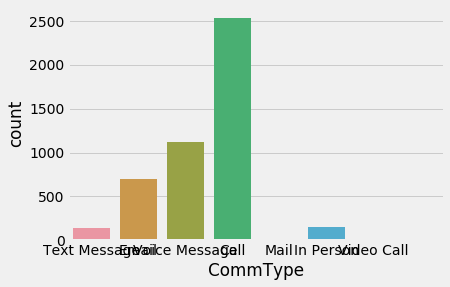

In [293]:
sns.countplot(x='CommType', data = care_management_data)

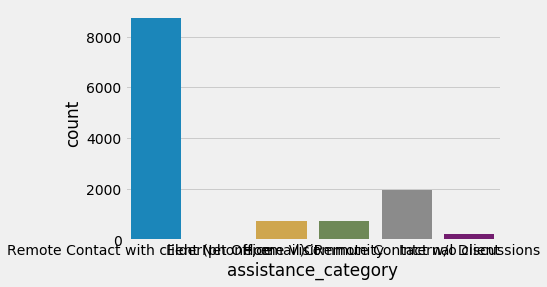

In [294]:
sns.countplot(x='assistance_category', data = care_management_data)

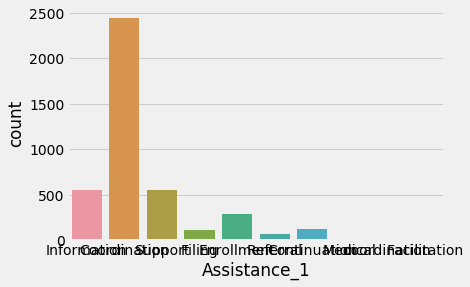

In [295]:
sns.countplot(x='Assistance_1', data = care_management_data)

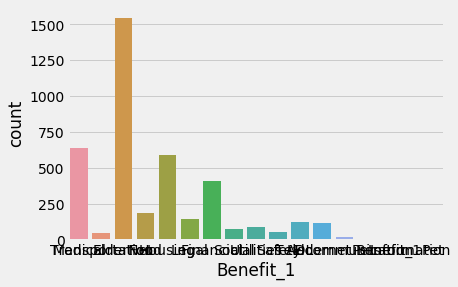

In [296]:
sns.countplot(x='Benefit_1', data = care_management_data)

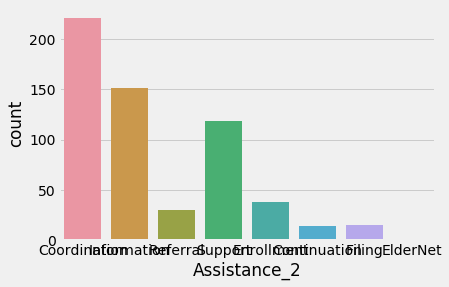

In [297]:
sns.countplot(x='Assistance_2', data = care_management_data)

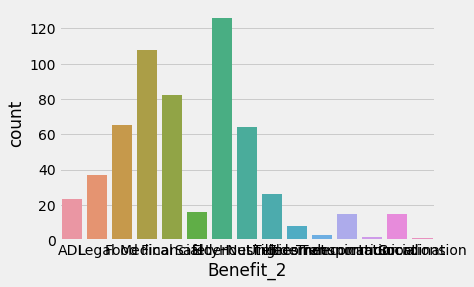

In [298]:
sns.countplot(x='Benefit_2', data = care_management_data)

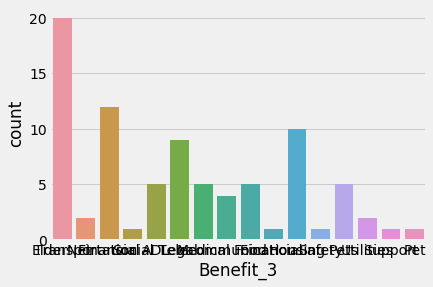

In [299]:
sns.countplot(x='Benefit_3', data = care_management_data)

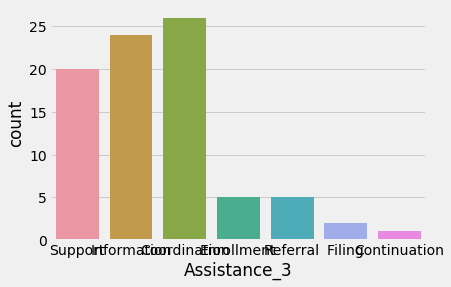

In [300]:
sns.countplot(x='Assistance_3', data = care_management_data)

In [301]:
care_management_data.sort_values(by='amount', ascending = False)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
2483,168,2019-06-12 13:20:00,Community,183.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,382,2019-06-20 08:15:00,Community,180.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6735,139,2020-02-26 09:05:00,Home Visit,170.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,626,2019-04-04 13:50:00,Home Visit,170.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12180,127,2021-07-19 09:20:00,Community,160.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,314,2019-09-27 13:25:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8624,168,2020-06-18 12:20:00,Remote Contact w/o client,1.0,Minutes,Voice Message,Social Worker,ElderNet,Medical,Coordination,NaN,NaN,NaN,NaN
8622,588,2020-06-18 12:10:00,Remote Contact w/o client,1.0,Minutes,Email,Family,ElderNet,NaN,NaN,NaN,NaN,NaN,NaN
8620,11,2020-06-18 12:00:00,"Remote Contact with client (phone, email)",1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [302]:
from datetime import datetime
care_management_data['assistance_date'] = datetime.fromisoformat(care_management_data['assistance_date'])

TypeError: fromisoformat: argument must be str

In [ ]:
care_management_data.assistance_date = pd.to_datetime(care_management_data.assistance_date, infer_datetime_format=True)  
care_management_data

In [ ]:
#care_management_data = care_management_data.set_index('assistance_date')
care_management_days = care_management_data.resample('1M')

In [ ]:
care_management_data['counter'] = 1
care_management_data

In [ ]:
care_management_data.CommType

In [ ]:
sns.lineplot(x='assistance_date', y="counter", data=care_management_month)

In [ ]:
sns.lineplot(x='assistance_date', y="Assistance_1", data=care_management_month)

In [ ]:
sns.lineplot(x='assistance_date', y="Benefit_1", data=care_management_month)

In [ ]:
sns.lineplot(x='assistance_date', y="Assistance_2", data=care_management_month)

In [ ]:
sns.lineplot(x='assistance_date', y="Benefit_2", data=care_management_month)

In [ ]:
sns.lineplot(x='assistance_date', y="Assistance_3", data=care_management_month)

In [ ]:
sns.lineplot(x='assistance_date', y="Benefit_3", data=care_management_month)

In [ ]:
care_management_data.groupby('assistant')

In [ ]:
care_management_data = care_management_data.set_index('anon_ID')
volunteer_services_data = volunteer_services_data.set_index('anon_ID')
client_info_data = client_info_data.set_index('anon_ID')
pantry_data = pantry_data.set_index('anon_ID')

In [ ]:
client_info_data

In [ ]:
care_management_data

In [ ]:
care_management_data['assistance_category'].values

In [ ]:
#client_data_joined = client_data_joined.join(pantry_data, on = 'anon_ID', how = 'left')
client_data_joined = client_info_data.merge(pantry_data_grouped,on = 'anon_ID', how = 'left')
client_data_joined

In [ ]:
client_data_joined = client_data_joined.rename({'assistance_category':'pantry_assistance_category','unit':'pantry_unit','amount':'pantry_amount',
                                               'counter':'pantry_counter'}, axis=1)
client_data_joined

In [ ]:
client_data_joined = client_data_joined.merge(volunteer_services_data_grouped, on = 'anon_ID', how = 'left')
client_data_joined

In [ ]:
client_data_joined = client_data_joined.rename({'category':'volunteer_category','diff_ride_days':'volunteer_diff_ride_days','appt_duration':'volunteer_appt_duration',
                                               'counter':'volunteer_counter'}, axis=1)
client_data_joined

In [ ]:
client_data_joined = client_data_joined.merge(care_management_data_grouped_1, on = 'anon_ID', how = 'left')
client_data_joined

In [ ]:
client_data_joined = client_data_joined.rename({'assistance_category':'care_management_category','unit':'care_management_unit','CommType':'care_management_CommType',
                                               'Party':'care_management_Party','InitiatedBy':'care_management_InitiatedBy','Benefit_1':'care_management_Benefit_1',
                                                'Assistance_1':'care_management_Assistance_1',
                                               'Benefit_2':'care_management_Benefit_2','Assistance_2':'care_management_Assistance_2','Benefit_3':'care_management_Benefit_3',
                                               'Assistance_3':'care_management_Assistance_3','amount':'care_management_amount','counter':'care_management_counter'}, axis=1)
client_data_joined

In [ ]:
client_data_joined.columns

In [ ]:
client_data_joined['care_management_counter'].sort_values(ascending=False)

In [ ]:
client_data_joined

In [ ]:
client_data_joined.groupby('unit_y').sum()

In [ ]:
client_data_joined.isna().sum()

In [ ]:
pantry_data

In [ ]:
volunteer_services_data

In [ ]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [ ]:
volunteer_services_data['rider_first_ride_date'] = pd.to_datetime(volunteer_services_data['rider_first_ride_date'], infer_datetime_format=True)
volunteer_services_data['rider_last_ride_date'] = pd.to_datetime(volunteer_services_data['rider_last_ride_date'], infer_datetime_format=True)  

In [ ]:
volunteer_services_data['diff_ride_days'] = abs(volunteer_services_data['rider_first_ride_date'] - volunteer_services_data['rider_last_ride_date'])

In [ ]:
volunteer_services_data.groupby(['anon_ID','diff_ride_days']).count()

In [ ]:
volunteer_services_data['category'].unique()

In [ ]:
volunteer_services_data['counter'] = 1

In [ ]:

volunteer_services_data_grouped = volunteer_services_data.groupby(['anon_ID','category','diff_ride_days']).sum()
volunteer_services_data_grouped = volunteer_services_data_grouped.reset_index()
volunteer_services_data_grouped

In [ ]:
volunteer_services_data.groupby(['anon_ID']).sum()

In [ ]:
volunteer_services_data.describe()

In [ ]:
volunteer_services_data.groupby('category').mean()

In [ ]:
volunteer_services_data.groupby('category').sum()

In [ ]:
sns.countplot(x='category', data = volunteer_services_data)

In [ ]:
volunteer_services_data['rider_num_rides'].values

In [ ]:
volunteer

In [ ]:
client_info_data

In [ ]:
donations_data

In [ ]:
donations_data['campaign'].value_counts()

In [ ]:
donations_data.groupby('campaign').sum()

In [ ]:
organization_donations = donations_data.loc[donations_data['organisation'] == 'Y'].sort_values(by='amount', ascending = False)
organization_donations

In [ ]:
organization_donations['anon_donor_id'].value_counts()

In [ ]:
donations_data.groupby('zip').sum().sort_values(by='amount', ascending=False)

In [ ]:
pantry_data

In [ ]:
pantry_data['counter'] = 1

In [ ]:
pantry_data_grouped = pantry_data.groupby(['anon_ID','assistance_category','unit']).sum().reset_index()

In [ ]:
pantry_data_grouped

In [ ]:
sns.countplot(x='unit',data = pantry_data)

In [ ]:
sns.countplot(x='assistance_category',data = pantry_data)

In [ ]:
pantry_data.groupby(['anon_ID','assistance_category']).sum()

In [ ]:
pantry_data.groupby('unit').sum()

In [ ]:
def count_plots(df):
    for col in df:
        fig = plt.figure(figsize =(10, 7))
 
        # Horizontal Bar Plot

        sns.set_theme(style="darkgrid")
        ax = sns.countplot(x=col, data=df)
        sns.set(rc={'figure.figsize':(15,12)})
        # Show Plot
        plt.show()

In [ ]:
import seaborn as sns

In [ ]:
count_plots(care_management_data)

In [ ]:
count_plots(client_info_data)

In [ ]:
count_plots(donations_data)

In [ ]:
count_plots(pantry_data)

In [ ]:
count_plots(volunteer_services_data)

In [ ]:
pantry_data.columns

In [ ]:
pantry_data.groupby('assistance_category').plot(x = 'assistance_date', y = 'amount')

In [ ]:
plt.boxplot(donations_data.amount)

In [ ]:
plt.boxplot(pantry_data.amount)

In [ ]:
plt.boxplot(volunteer_services_data.appt_duration)

In [ ]:
volunteer_services_data.describe()

In [ ]:
import seaborn as sns
#units_df_min
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="county", data=client_info_data)
# Show Plot
plt.show()

In [ ]:
na_df = pd.DataFrame(dataTrain.isna().sum())

In [ ]:
na_df

In [ ]:
dataTrain.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [ ]:
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n")

In [ ]:
catCols = [col for col in dataTrain.columns if dataTrain[col].dtype=="O"]
for i in dataTrain:
    if i in catCols:
        cat_analyzer(dataTrain, i)

In [ ]:
dataTrain.columns

In [ ]:
# Figure Size

units_df_min = dataTrain.loc[dataTrain['unit'] == 'Minutes']

#units_df_min
fig = plt.figure(figsize =(15, 12))
 
# Horizontal Bar Plot
plt.bar(units_df_min.assistance_category, units_df_min.amount)
 
# Show Plot
plt.show()

In [ ]:
dataTrain.unit